In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
deaths = pd.read_csv("avg_deaths.csv")   # 1st January to 15 December 2020
deaths.head()

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448


In [3]:
import calendar

In [4]:
deaths["Num_days"] = 0

In [5]:
deaths

,Month,New_deaths,Num_days
0,1,0,0
1,2,0,0
2,3,77,0
3,4,1844,0
4,5,1448,0
5,6,785,0
6,7,769,0
7,8,1020,0
8,9,739,0
9,10,751,0


In [6]:
deaths["Year"] = 2020

In [7]:
deaths

,Month,New_deaths,Num_days,Year
0,1,0,0,2020
1,2,0,0,2020
2,3,77,0,2020
3,4,1844,0,2020
4,5,1448,0,2020
5,6,785,0,2020
6,7,769,0,2020
7,8,1020,0,2020
8,9,739,0,2020
9,10,751,0,2020


In [8]:
deaths.columns

Index(['Month', 'New_deaths', 'Num_days', 'Year'], dtype='object')

In [9]:
deaths = deaths[["Year", "Month", "Num_days", "New_deaths"]]

deaths

,Year,Month,Num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [10]:
deaths.columns = ['Year','Month','Num_of_days' ,'New_deaths', ]
deaths

,Year,Month,Num_of_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [11]:
def days(year, month):
    _, num_days = calendar.monthrange(year, month)
    return num_days

In [13]:
days = (deaths[['Year','Month']]).apply(lambda row:days(row['Year'], row['Month']), axis = 1)

In [14]:
deaths.Num_of_days = days

In [15]:
deaths

,Year,Month,Num_of_days,New_deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [16]:
# 1st January to 15 December 2020

deaths.loc[11, "Num_of_days"] //= 2

# deaths.loc[11, "Num_of_days"] = 15

In [17]:
deaths

,Year,Month,Num_of_days,New_deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [18]:
deaths["Monthly_deaths"] = deaths.Num_of_days.mul(deaths.New_deaths)

In [19]:
deaths.head()

,Year,Month,Num_of_days,New_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888


In [20]:
deaths.rename({"New_deaths":"Avg_deaths"}, axis = 1, inplace = True)

In [21]:
deaths.head()

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888


In [22]:
deaths["Cum_deaths"] = deaths.Monthly_deaths.cumsum()

In [38]:
deaths

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [24]:
deaths["Avg_deaths"].mean()

908.75

In [ ]:
# january - march
# march - june
# june - october
# october - december

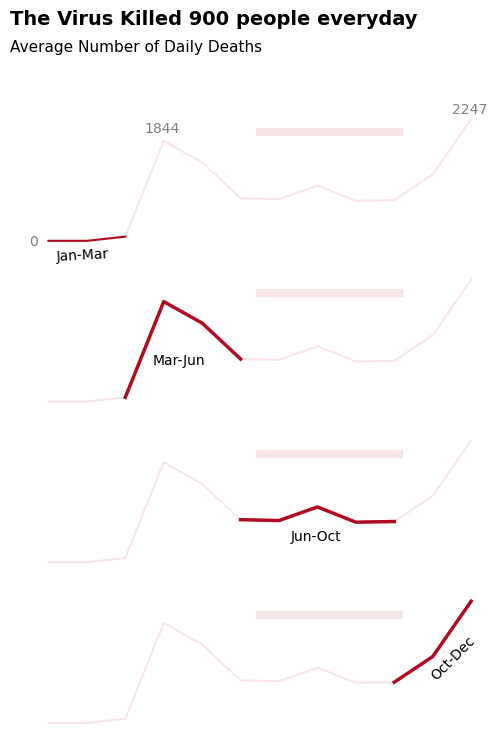

In [96]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e",)
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.2, y = -350, s = "Jan-Mar", rotation = 3)
ax1.text(x = 0, y = 4000, s = "The Virus Killed 900 people everyday", size = 14, weight = "bold")
ax1.text(x = 0, y = 3500, s = "Average Number of Daily Deaths", size = 11,)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y = 690, s = "Mar-Jun", )


ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) 
ax3.text(x = 7.3, y = 400, s = "Jun-Oct", )


ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5) 
ax4.text(x = 10.9, y = 800, s = "Oct-Dec", rotation = 45)


for ax in axes:
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)

        
plt.show()        

In [93]:
cum_cases = [deaths.loc[2, "Cum_deaths"], deaths.loc[5, "Cum_deaths"], deaths.loc[9, "Cum_deaths"], deaths.loc[11, "Cum_deaths"]]

In [94]:
cum_cases

[2387, 126145, 227055, 297510]

In [98]:
proportions = [round(i/cum_cases[-1], 2) for i in cum_cases]

In [99]:
proportions

[0.01, 0.42, 0.76, 1.0]

In [102]:
proportions = []

for i in cum_cases:
    v = i/297510
    final = round(v, 2)
#   print(final)
    proportions.append(final)

In [103]:
proportions

[0.01, 0.42, 0.76, 1.0]

In [107]:
xmaxs = [0.5 + i * (0.8 - 0.5) for i in proportions]

In [108]:
xmaxs

[0.503, 0.626, 0.728, 0.8]

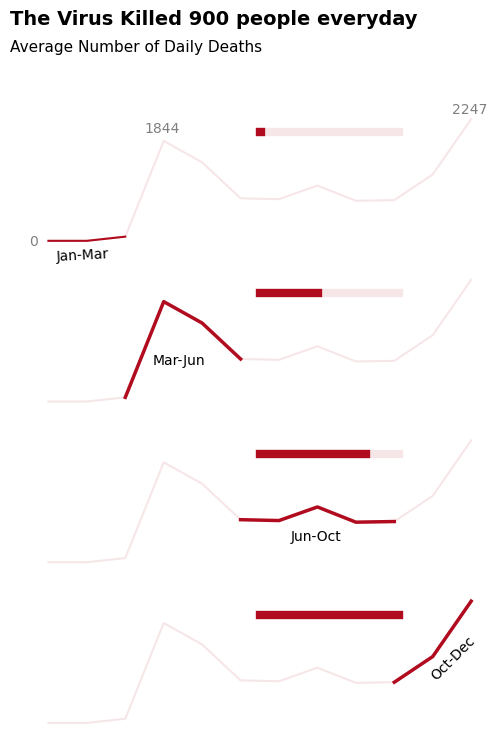

In [111]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e",)
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.2, y = -350, s = "Jan-Mar", rotation = 3)
ax1.text(x = 0, y = 4000, s = "The Virus Killed 900 people everyday", size = 14, weight = "bold")
ax1.text(x = 0, y = 3500, s = "Average Number of Daily Deaths", size = 11,)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y = 690, s = "Mar-Jun", )


ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) 
ax3.text(x = 7.3, y = 400, s = "Jun-Oct", )


ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5) 
ax4.text(x = 10.9, y = 800, s = "Oct-Dec", rotation = 45)


for ax, xmax in zip(axes, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6,)

        
plt.show()        

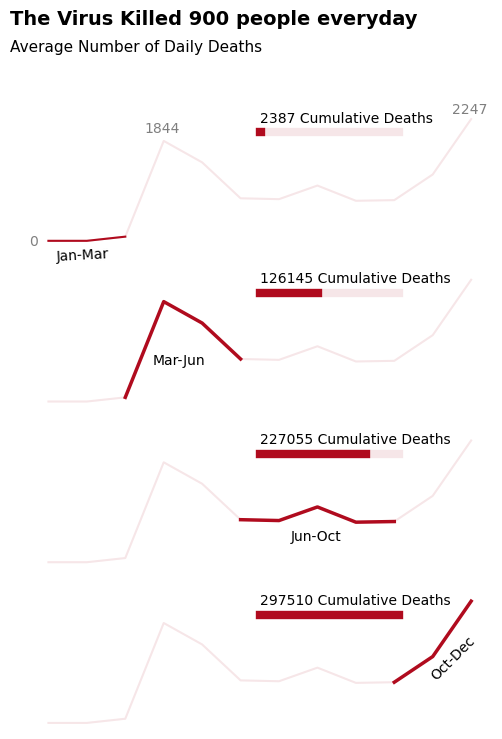

In [119]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e",)
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.2, y = -350, s = "Jan-Mar", rotation = 3)
ax1.text(x = 0, y = 4000, s = "The Virus Killed 900 people everyday", size = 14, weight = "bold")
ax1.text(x = 0, y = 3500, s = "Average Number of Daily Deaths", size = 11,)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y = 690, s = "Mar-Jun", )


ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) 
ax3.text(x = 7.3, y = 400, s = "Jun-Oct", )


ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5) 
ax4.text(x = 10.9, y = 800, s = "Oct-Dec", rotation = 45)


for ax, death, xmax in zip(axes, cum_cases, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6,)
    ax.text(x = 6.5, y = 2200, s = str(death) + " Cumulative Deaths",)

        
plt.show()       

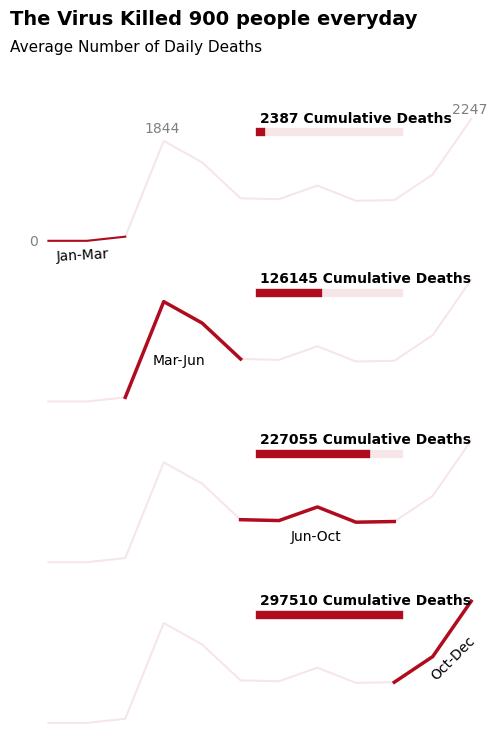

In [120]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e",)
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.2, y = -350, s = "Jan-Mar", rotation = 3)
ax1.text(x = 0, y = 4000, s = "The Virus Killed 900 people everyday", size = 14, weight = "bold")
ax1.text(x = 0, y = 3500, s = "Average Number of Daily Deaths", size = 11,)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y = 690, s = "Mar-Jun", )


ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) 
ax3.text(x = 7.3, y = 400, s = "Jun-Oct", )


ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5) 
ax4.text(x = 10.9, y = 800, s = "Oct-Dec", rotation = 45)


for ax, death, xmax in zip(axes, cum_cases, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6,)
    ax.text(x = 6.5, y = 2200, s = str(death) + " Cumulative Deaths", weight = "bold")

        
plt.show()       

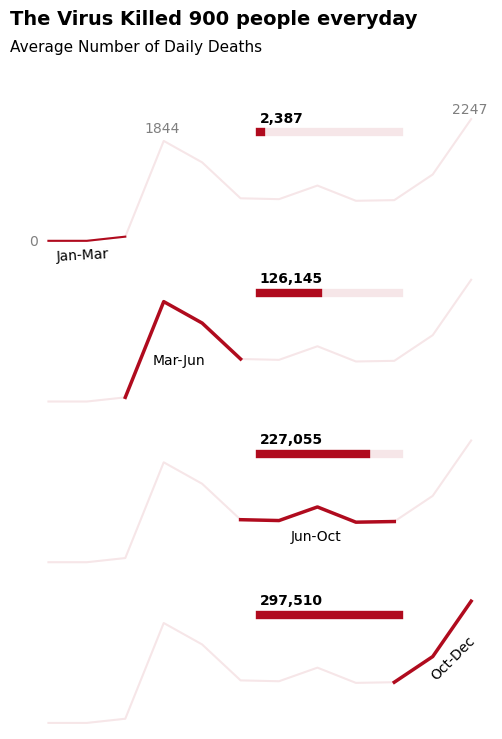

In [121]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e",)
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.2, y = -350, s = "Jan-Mar", rotation = 3)
ax1.text(x = 0, y = 4000, s = "The Virus Killed 900 people everyday", size = 14, weight = "bold")
ax1.text(x = 0, y = 3500, s = "Average Number of Daily Deaths", size = 11,)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y = 690, s = "Mar-Jun", )


ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) 
ax3.text(x = 7.3, y = 400, s = "Jun-Oct", )


ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5) 
ax4.text(x = 10.9, y = 800, s = "Oct-Dec", rotation = 45)


for ax, death, xmax in zip(axes, cum_cases, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6,)
    ax.text(x = 6.5, y = 2200, s = format(death, ","), weight = "bold")

        
plt.show()       

[ 0.  2.  4.  6.  8. 10. 12. 14.]
[-1000.     0.  1000.  2000.  3000.]


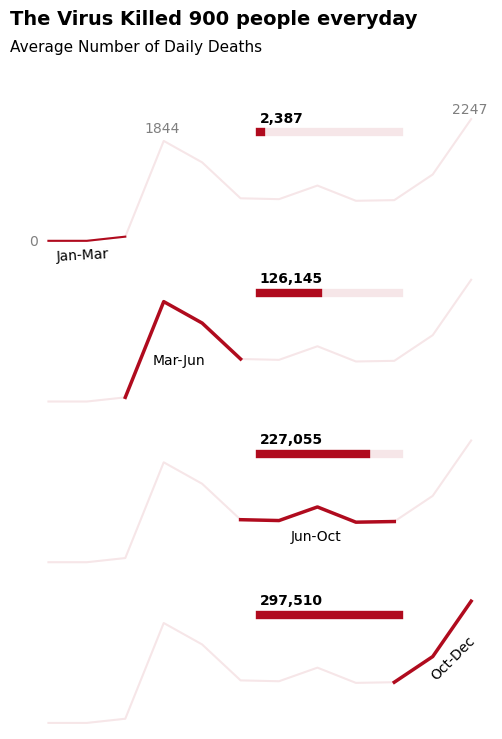

In [122]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e",)
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.2, y = -350, s = "Jan-Mar", rotation = 3)
ax1.text(x = 0, y = 4000, s = "The Virus Killed 900 people everyday", size = 14, weight = "bold")
ax1.text(x = 0, y = 3500, s = "Average Number of Daily Deaths", size = 11,)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y = 690, s = "Mar-Jun", )


ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) 
ax3.text(x = 7.3, y = 400, s = "Jun-Oct", )


ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5) 
ax4.text(x = 10.9, y = 800, s = "Oct-Dec", rotation = 45)


for ax, death, xmax in zip(axes, cum_cases, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6,)
    ax.text(x = 6.5, y = 2200, s = format(death, ","), weight = "bold")


print(ax1.get_xticks())
print(ax1.get_yticks())


plt.show()       